#### Loading and Preprocessing the Image

This code block imports necessary libraries and defines a function to load and preprocess an image from a specified file path.

**Libraries Used:**
- `tensorflow`: Used for creating and manipulating tensors, essential for deep learning operations.
- `numpy`: Provides support for numerical operations on arrays, facilitating data manipulation.
- `matplotlib.pyplot`: Used for plotting and visualizing images and results.
- `cv2` (OpenCV): Used for reading and processing images.

**Steps:**
1. **Import Libraries:**
   - `import tensorflow as tf`: Imports TensorFlow, a widely-used framework for deep learning.
   - `import numpy as np`: Imports NumPy for numerical operations on arrays.
   - `import matplotlib.pyplot as plt`: Imports Matplotlib's pyplot module for plotting images.
   - `import cv2`: Imports OpenCV (cv2) for reading and processing images.

2. **Define Image Path:**
   - `image_path = '/Users/aristotelisgkithkopoulos/Desktop/Convolutional Example/photos/images.jpeg'`: Specifies the path to the image file to be loaded and processed.

3. **Load and Preprocess Image Function (`load_image`):**
   - `def load_image(image_path):`: Defines a function `load_image` that takes `image_path` as an argument.
   - `image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)`: Uses OpenCV to read the image in grayscale mode.
   - `image = cv2.resize(image, (128, 128))`: Resizes the image to a fixed size of 128x128 pixels.
   - `image = image / 255.0`: Normalizes the pixel values to a range of [0, 1] for consistency and to facilitate neural network training.
   - `image = np.expand_dims(image, axis=-1)`: Adds a channel dimension to the image. In this case, it adds a single channel (grayscale).

**Purpose:**
- This code block sets up the initial steps necessary to load and preprocess an image for subsequent convolutional and pooling operations in a deep learning pipeline.
- It ensures the image is in the correct format (grayscale with a defined size) and normalized, preparing it for further manipulation and analysis.

**Next Steps:**
- The preprocessed image can now be passed to convolutional and pooling layers for feature extraction and dimensionality reduction, respectively.
- Subsequent code blocks will apply convolutional filters, perform pooling operations, and visualize the results to analyze the extracted features from the image.



In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

image_path = '/Users/aristotelisgkithkopoulos/Desktop/Convolutional Example/photos/images.jpeg'
# Load and preprocess the image
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))
    image = image / 255.0
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    return image


Defines two essential convolutional filters:
- **Vertical Filter:** Detects vertical edges by assigning positive weights to the left side, zero to the middle, and negative weights to the right side.
- **Horizontal Filter:** Detects horizontal edges by assigning positive weights to the top row, zero to the middle row, and negative weights to the bottom row.

These filters are crucial for edge detection and feature extraction in image processing tasks.


In [34]:
# Define convolution filters
vertical_filter = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]], dtype=np.float32)

horizontal_filter = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]], dtype=np.float32)



#### apply_convolution(image, kernel)

This function applies convolution to an input image using a specified kernel.

**Parameters:**
- `image`: Input image to be convolved, expected as a numpy array.
- `kernel`: Convolution kernel (filter) defined as a numpy array.

**Steps:**
1. Converts the input `image` and `kernel` into TensorFlow tensors.
2. Adjusts the dimensions of the `kernel` to match TensorFlow's requirements.
3. Expands the `image` tensor to include batch dimension.
4. Applies 2D convolution using `tf.nn.conv2d` with specified strides and padding.
5. Returns the convolved image after squeezing it into a numpy array format.

**Purpose:**
- Enables feature extraction from images through convolution, capturing patterns defined by the kernel.

---

#### apply_pooling(image)

This function applies max pooling to an input image.

**Parameters:**
- `image`: Input image to be pooled, expected as a numpy array.

**Steps:**
1. Checks the shape of `image` to ensure it includes necessary dimensions (batch and channel).
2. If dimensions are missing, expands `image` to include batch and channel dimensions as needed.
3. Converts the `image` to a TensorFlow tensor.
4. Applies max pooling using `tf.nn.max_pool2d` with a kernel size of 2x2, stride of 2, and 'SAME' padding.
5. Returns the pooled image after squeezing it into a numpy array format.

**Purpose:**
- Reduces spatial dimensions of the input image, emphasizing important features.

---

#### display_results(original, vertical, horizontal, pooled_vertical, pooled_horizontal)

This function displays the results of convolution and pooling operations for visualization.

**Parameters:**
- `original`: Original input image.
- `vertical`: Image after vertical convolution.
- `horizontal`: Image after horizontal convolution.
- `pooled_vertical`: Image after max pooling of vertical convolution result.
- `pooled_horizontal`: Image after max pooling of horizontal convolution result.

**Steps:**
1. Creates a 2x3 grid of subplots using matplotlib.
2. Displays the original image, vertical and horizontal convolution results, and pooled versions of both.
3. Each subplot is titled accordingly to indicate the type of operation applied.
4. Hides axis for cleaner visualization.
5. Shows the plot with tight layout for improved presentation.

**Purpose:**
- Facilitates visual inspection of image transformations through convolution and pooling operations.


In [35]:
def apply_convolution(image, kernel):
    image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    kernel = kernel[:, :, np.newaxis, np.newaxis]  # Adjust filter dimensions
    kernel_tensor = tf.convert_to_tensor(kernel, dtype=tf.float32)
    image_tensor = tf.expand_dims(image_tensor, axis=0)  # Add batch dimension
    convolved = tf.nn.conv2d(image_tensor, kernel_tensor, strides=[1, 1, 1, 1], padding='SAME')
    return tf.squeeze(convolved).numpy()

def apply_pooling(image):
    if len(image.shape) == 2:  # Missing both batch and channel dimensions
        image = np.expand_dims(image, axis=-1)  # Add channel dimension
        image = np.expand_dims(image, axis=0)  # Add batch dimension
    elif len(image.shape) == 3:  # Missing batch dimension
        image = np.expand_dims(image, axis=0)  # Add batch dimension
    image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    pooled = tf.nn.max_pool2d(image_tensor, ksize=2, strides=2, padding='SAME')
    return tf.squeeze(pooled).numpy()

# Display results
def display_results(original, vertical, horizontal, pooled_vertical, pooled_horizontal):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    
    axes[0, 0].imshow(original, cmap='gray')
    axes[0, 0].set_title('Original Image')
    
    axes[0, 1].imshow(vertical, cmap='gray')
    axes[0, 1].set_title('Vertical Convolution')
    
    axes[0, 2].imshow(horizontal, cmap='gray')
    axes[0, 2].set_title('Horizontal Convolution')
    
    axes[1, 1].imshow(pooled_vertical, cmap='gray')
    axes[1, 1].set_title('Pooled Vertical')
    
    axes[1, 2].imshow(pooled_horizontal, cmap='gray')
    axes[1, 2].set_title('Pooled Horizontal')
    
    for ax in axes.flat:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

#### Main Function

The `main` function orchestrates image processing steps including convolution, pooling, and visualization.

**Parameters:**
- `image_path`: Path to the input image file.

**Steps:**
1. Loads and preprocesses the image using `load_image`.
2. Applies vertical and horizontal convolution using `apply_convolution` with predefined filters.
3. Performs max pooling on the convolved images using `apply_pooling`.
4. Displays the original image, vertical and horizontal convolution results, and their pooled versions using `display_results`.

**Purpose:**
- Demonstrates the application of convolutional operations and pooling techniques for feature extraction and visualization.

---

#### Example Usage

The example usage section showcases how to use the `main` function with different sample images.

**Steps:**
1. Prints 'Example of a cat' followed by processing an image of a cat.
2. Prints 'Example of a block of flats' followed by processing an image of a block of flats.
3. Calls `main` function with respective image paths to execute image processing and display results.

**Purpose:**
- Illustrates the versatility of the `main` function in handling various images and showcasing their convolutional and pooling transformations.


Example of a cat
Shape before pooling: (128, 128)
Shape before pooling: (128, 128)


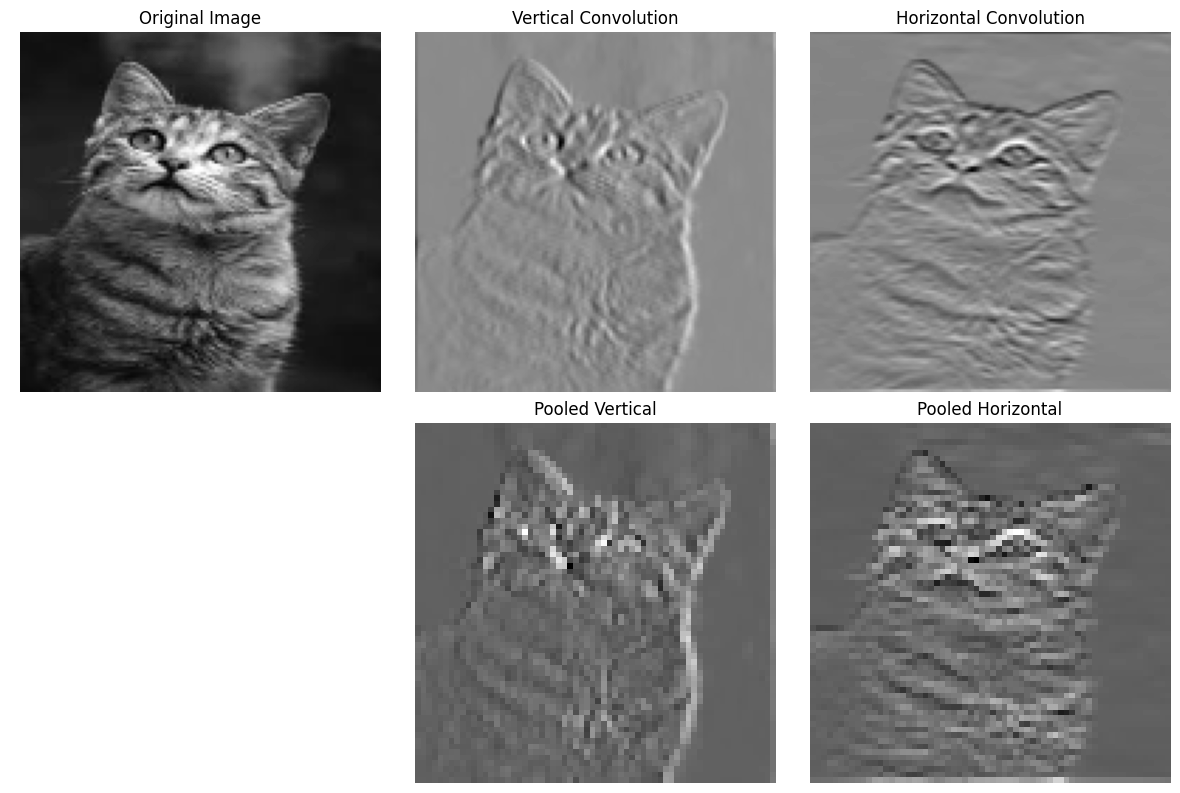

Example of a block of flats
Shape before pooling: (128, 128)
Shape before pooling: (128, 128)


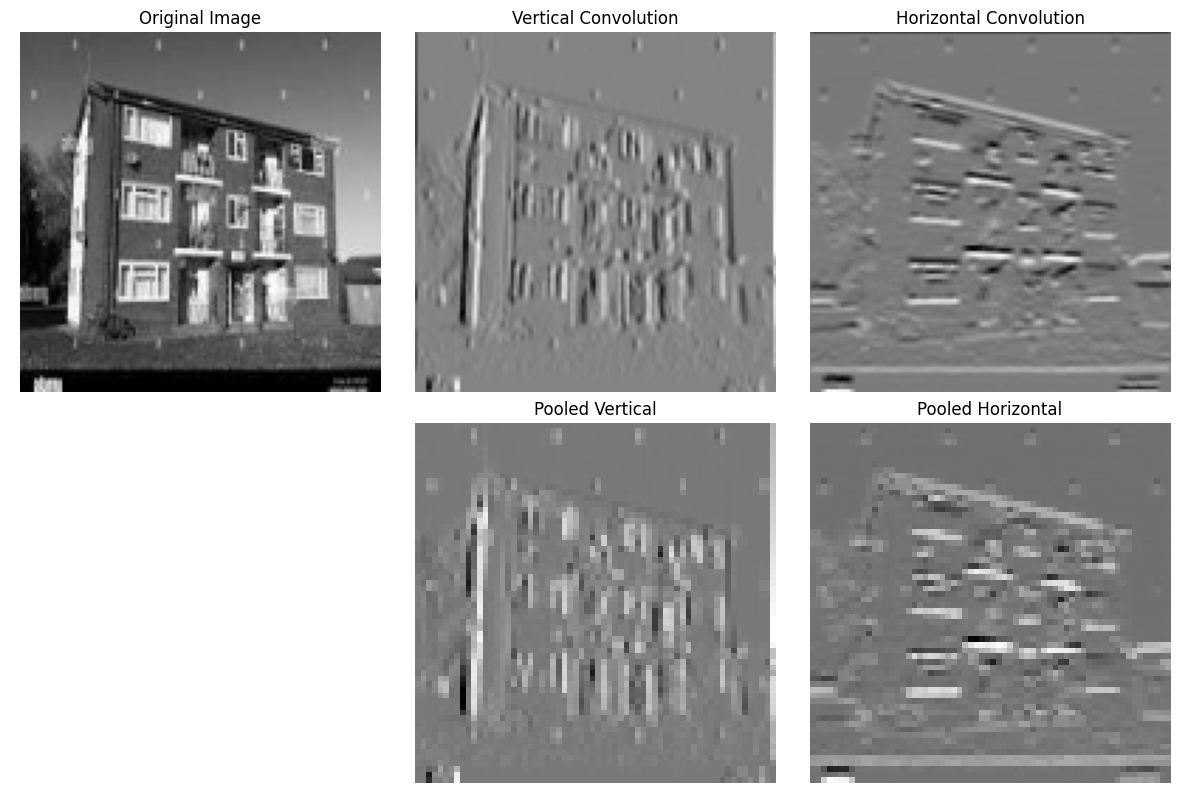

In [41]:
# Main function
def main(image_path):
    image = load_image(image_path)
    vertical_convolved = apply_convolution(image, vertical_filter)
    horizontal_convolved = apply_convolution(image, horizontal_filter)
    pooled_vertical = apply_pooling(vertical_convolved)
    pooled_horizontal = apply_pooling(horizontal_convolved)
    
    display_results(image.squeeze(), vertical_convolved, horizontal_convolved, pooled_vertical, pooled_horizontal)

# Example usage with a sample image
# Replace 'path_to_image.jpg' with the path to your image file
print('Example of a cat')
main('photos/images.jpeg')
print('Example of a block of flats')
main('photos/block.jpeg')